In [9]:
s = "65         173         533        1230          442        1044         870         242        1007        1059         187        1023          35         810         407        1538          33         171         283        1530         168         196         470          40         200         214          53        1053        1088          28          36          48         178         113         983          44          91        1480          51          96         951        1248        1537         227         298         500        1345           1         999         885         236           2        3           4        1466         188        1279         549         352        1400         299        1471         521          61         121        1398        1455         861       458          68         583        1463         167         285         204         507        969        1229"


In [10]:
import pandas as pd
import numpy as np
import os

In [11]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
%pwd

'/content/drive/MyDrive'

In [12]:
pos = s.split();
pos.append('1559')
for i in range(len(pos)):
  pos[i] = int(pos[i])
pos_sorted = sorted(pos)


In [13]:
len(pos_sorted)

79

In [14]:
df = pd.read_csv("Synthetic_data.csv")

In [ ]:
# dict_n = pd.DataFrame.to_dict(df, orient = "records")

In [ ]:
#dict_n

In [ ]:
heads = df.columns.to_list()
heads

In [16]:
reducts = list()
for i in range(len(pos)):
  curr = int(pos_sorted[i]) - 1
  reducts.append(heads[curr])
# reducts

In [17]:
apple = df[reducts]
# apple.describe()

In [ ]:
apple.to_csv("reducts_data", index = False)

In [18]:
df = apple

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import collections
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


%matplotlib inline
import os

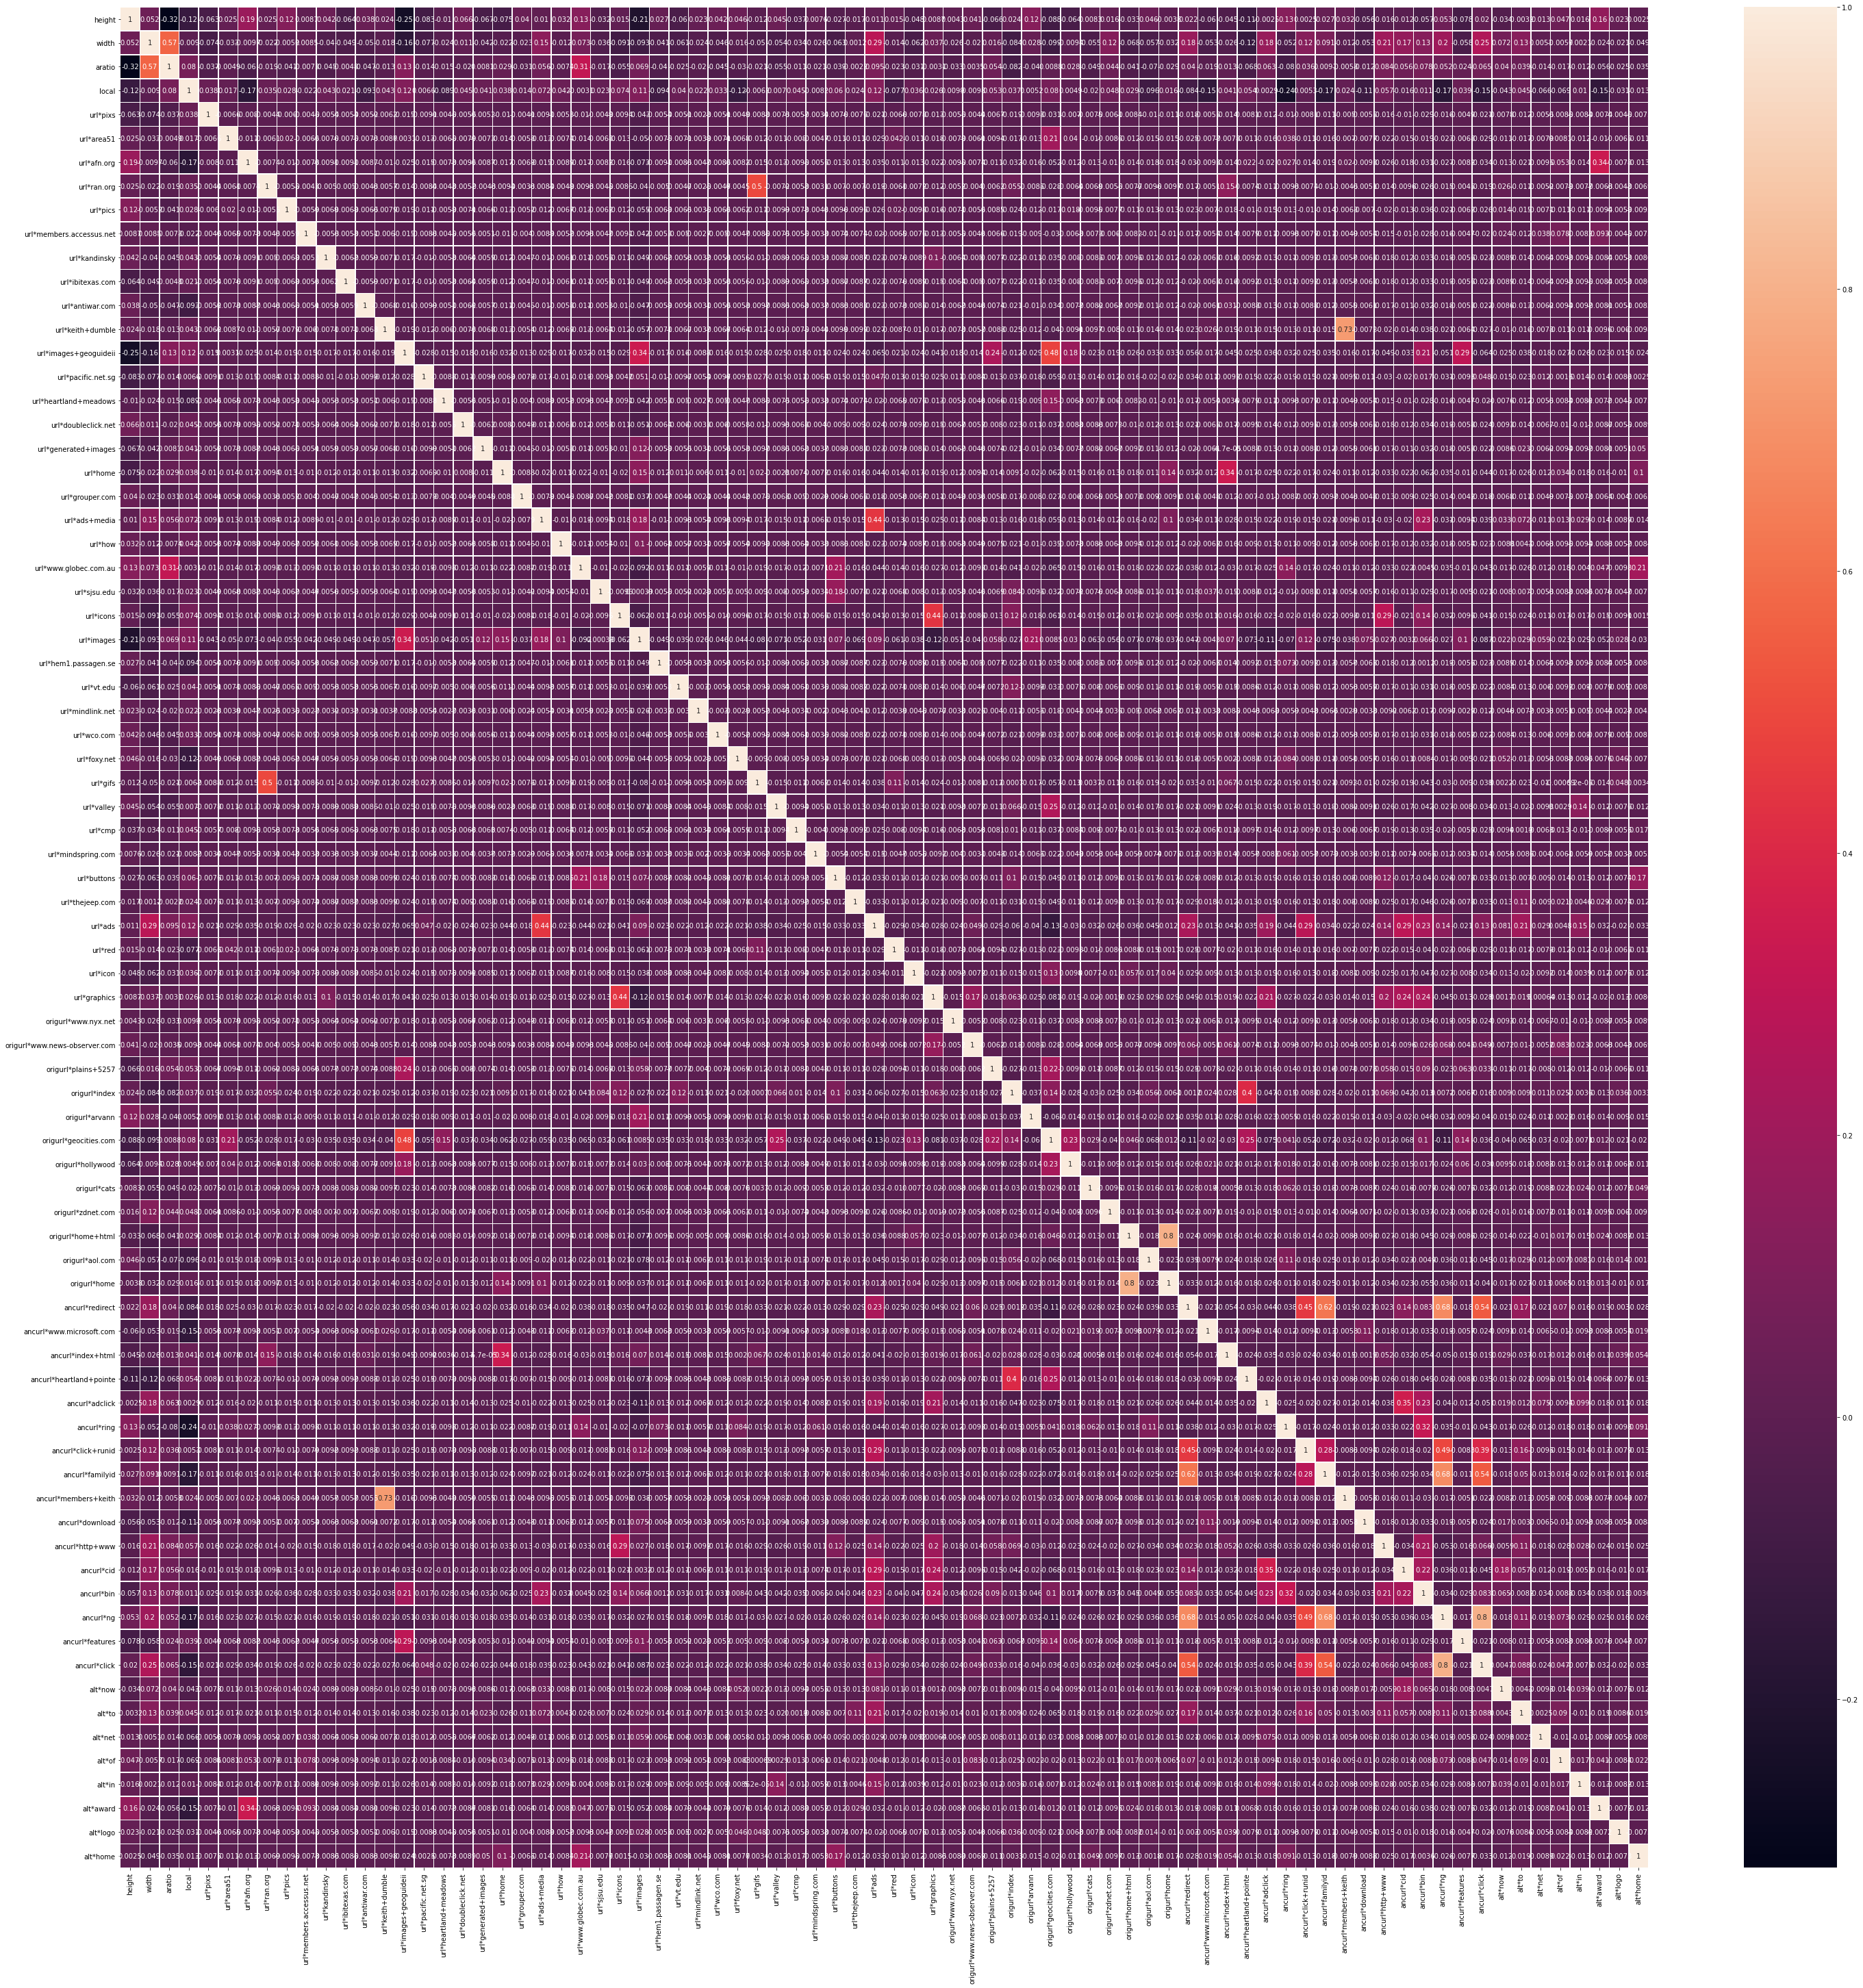

In [20]:
columns_for_visualization = list()
for i in range(78):
  columns_for_visualization.append(reducts[i])
corr=df[columns_for_visualization].corr()
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(corr,annot=True,linewidths=.5, ax=ax)

In [21]:
da=df.values
X=da[:,:-1]
y=da[:,-1]


xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=80)

In [22]:
def fit_models(classifiers,xtrain,ytrain):
    """This function fit multiple models by sklearn and return the dictionary with values as  objects of models"""
    models=collections.OrderedDict()
    for constructor in classifiers:
        obj=constructor()
        obj.fit(xtrain,ytrain)
        models[str(constructor).split(':')[0]]=obj
    return models

def classification_multi_report(ytest,models_array):
    """This function generate classification accuracy report for given input model objects"""
    for i in models_array:
        print('__________________________________________________')
        print('the model - '+str(i))
        print(classification_report(ytest,models_array[i].predict(xtest)))
def cross_Function(models,cv):
    """This function return cross validated accuray and the variance of given input model obejects"""
    accuracy={}
    for model in models:
        cross_val_array=cross_val_score(models[model],xtrain,ytrain,scoring='accuracy',cv=cv)
        accuracy[model]=[np.mean(cross_val_array),np.std(cross_val_array)]
    return accuracy

def multi_grid_search(param_grid_array,estimator_list,x,y):
    """This function calculate the grid search parameters and accuracy  for given input modles and return dictionary with each tupple containing accuracy and best parameters"""
    d={}
    count=0
    for i in estimator_list:
        gc=GridSearchCV(estimator=estimator_list[i],param_grid=param_grid_array[count],scoring ='accuracy',cv=5).fit(x,y)
        d[i]=(gc.best_params_,gc.best_score_)
        count+=1
    return d

In [23]:
classifiers=[SVC, KNeighborsClassifier, RandomForestClassifier, XGBClassifier, DecisionTreeClassifier, LogisticRegression]

# classifiers=[GaussianNB,SVC,KNeighborsClassifier]

model_list=fit_models(classifiers,xtrain,ytrain)

classification_multi_report(ytest,model_list)

__________________________________________________
the model - <class 'sklearn.svm._classes.SVC'>
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       419
         1.0       0.96      0.99      0.97       850

    accuracy                           0.96      1269
   macro avg       0.97      0.95      0.96      1269
weighted avg       0.96      0.96      0.96      1269

__________________________________________________
the model - <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95       419
         1.0       0.97      0.98      0.98       850

    accuracy                           0.97      1269
   macro avg       0.97      0.96      0.97      1269
weighted avg       0.97      0.97      0.97      1269

__________________________________________________
the model - <class 'sklearn.ensemble._forest.RandomForestClassifier'>

In [ ]:
obj=cross_Function(model_list,cv=20)
for model in obj:
    print('the model -'+str(model)+'has \n || crosss validated accuracy as  -> '+str(obj[model][0])+' | variance - '+str(obj[model][1])+' ||' )
    print('______________________________________________________________________________________________________________')

the model -<class 'sklearn.svm._classes.SVC'>has 
 || crosss validated accuracy as  -> 0.9486028568449587 | variance - 0.017137616914820825 ||
______________________________________________________________________________________________________________
the model -<class 'sklearn.neighbors._classification.KNeighborsClassifier'>has 
 || crosss validated accuracy as  -> 0.961273589823793 | variance - 0.01638786756881101 ||
______________________________________________________________________________________________________________
the model -<class 'sklearn.ensemble._forest.RandomForestClassifier'>has 
 || crosss validated accuracy as  -> 0.9703185277864665 | variance - 0.016823728659688383 ||
______________________________________________________________________________________________________________
the model -<class 'xgboost.sklearn.XGBClassifier'>has 
 || crosss validated accuracy as  -> 0.9467990824731517 | variance - 0.01655037482292594 ||
________________________________________

In [ ]:
param_grid_svm=[
    {
        'kernel':['linear'],'random_state':[0]
    },
     {
        'kernel':['rbf'],'random_state':[0]
     },
    
    {
        'kernel':['poly'],'degree':[1,2,3,4],'random_state':[0]
    }
]

param_grid_knn=[

    {   
        'n_neighbors':np.arange(1,3),
        'p':[2]
        
    }
]

param_RandomForest = [
    {
        'n_estimators': np.arange(100, 500, 50),
        'max_depth' : np.arange(5, 35, 5)
    }
]

param_XGB=[
    {
        'n_estimators' : np.arange(100, 500, 100)
    }
]

param_dc = [
  {
      
  }
]

param_XGBoost=[
    {
        'n_estimators' : np.arange(100, 500, 100),
        # 'max_depth' : np.arange(5, 30, 5)
    }
]

param_grid_array=[param_grid_svm, param_grid_knn, param_RandomForest, param_XGBoost, param_dc]
multi_grid_search(param_grid_array,model_list,xtrain,ytrain)

{"<class 'sklearn.ensemble._forest.RandomForestClassifier'>": ({'max_depth': 30,
   'n_estimators': 200},
  0.9681532877322641),
 "<class 'sklearn.neighbors._classification.KNeighborsClassifier'>": ({'n_neighbors': 1,
   'p': 2},
  0.9667027019943916),
 "<class 'sklearn.svm._classes.SVC'>": ({'degree': 4,
   'kernel': 'poly',
   'random_state': 0},
  0.951505621511125),
 "<class 'sklearn.tree._classes.DecisionTreeClassifier'>": ({},
  0.9547664910763425),
 "<class 'xgboost.sklearn.XGBClassifier'>": ({'n_estimators': 400},
  0.965620986974867)}

In [24]:
#Neural Net Models
#custom NN
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_csv("reducts_data")

In [26]:
da=df.values
X=da[:,:-1]
y=da[:,-1]


In [27]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.125, random_state=1)

In [ ]:
#model params
model=Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
# model.add(Dense(200,activation='sigmoid',input_shape=(15,)))
# model.add(Dropout(0.2))
# model.add(Dense(300,activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(200,activation='sigmoid'))
# model.add(Dense(100,activation='sigmoid'))
model.add(Dense(25,activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(20,activation='sigmoid'))
model.add(Dense(30,activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(25, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10,activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 30)                2370      
_________________________________________________________________
dense_31 (Dense)             (None, 25)                775       
_________________________________________________________________
dense_32 (Dense)             (None, 30)                780       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 31        
Total params: 3,956
Trainable params: 3,956
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy','AUC'])

# class_weights={0: 1,
#                 1:2.5,
#                 2: 5}
history = model.fit(X_train1, y_train1, batch_size=64, epochs=50, verbose=1, validation_data=(X_val, y_val))

Epoch 1/50
50/50 [==============================] - 1s 8ms/step - loss: 0.0752 - accuracy: 0.9758 - auc: 0.9943 - val_loss: 0.0800 - val_accuracy: 0.9772 - val_auc: 0.9929
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9765 - auc: 0.9957 - val_loss: 0.0810 - val_accuracy: 0.9772 - val_auc: 0.9931
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9793 - auc: 0.9955 - val_loss: 0.0799 - val_accuracy: 0.9747 - val_auc: 0.9933
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0653 - accuracy: 0.9778 - auc: 0.9951 - val_loss: 0.0781 - val_accuracy: 0.9772 - val_auc: 0.9933
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0688 - accuracy: 0.9796 - auc: 0.9946 - val_loss: 0.0793 - val_accuracy: 0.9772 - val_auc: 0.9929
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0622 - accuracy: 0.9797 - auc: 0.9956 - val_loss: 0.0790 - val_acc

In [ ]:
score = model.evaluate(X_test,y_test, verbose=0)
print(score)
print('Test accuracy:', score[1])

[0.12828904390335083, 0.9645569324493408, 0.9839913845062256]
Test accuracy: 0.9645569324493408


In [ ]:
model.save('reduct_Neural_net6.h5')

Model 1 reduct_Neural_net1.h5

[0.14056071639060974, 0.9645569324493408, 0.9756771922111511]
Test accuracy: 0.9645569324493408

Model 2 reduct_Neural_net2.h5

[0.13930460810661316, 0.9670885801315308, 0.977031946182251]
Test accuracy: 0.9670885801315308

Model 3 reduct_Neural_net3.h5


[0.13574625551700592, 0.9683544039726257, 0.9755361676216125]
Test accuracy: 0.9683544039726257

Model 4 : 'reduct_Neural_net4.h5'


[0.13601592183113098, 0.9708860516548157, 0.977410614490509]
Test accuracy: 0.9708860516548157

Model 5 : reduct_Neural_net5.h5


[0.14051833748817444, 0.9734176993370056, 0.9761374592781067]
Test accuracy: 0.9734176993370056

In [55]:
from keras.models import load_model
prevModel = load_model('reduct_Neural_net5.h5')

In [49]:
prevModel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30)                2370      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_14 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 16        
Total params: 3,321
Trainable params: 3,321
Non-trainable params: 0
_________________________________________________________________


In [50]:
score = prevModel.evaluate(X_train,y_train, verbose=0)
print(score)
print('Train accuracy:', score[1])

[0.03959997743368149, 0.9895041584968567, 0.9969519376754761]
Train accuracy: 0.9895041584968567


In [51]:
score = prevModel.evaluate(X_test,y_test, verbose=0)
print(score)
print('Test accuracy:', score[1])

[0.14051833748817444, 0.9734176993370056, 0.9761374592781067]
Test accuracy: 0.9734176993370056


In [52]:
score = prevModel.evaluate(X_val,y_val, verbose=0)
print(score)
print('Validation accuracy:', score[1])

[0.05778713524341583, 0.9848101139068604, 0.9950857758522034]
Validation accuracy: 0.9848101139068604
